In [1]:
from coffea.nanoaod import NanoEvents
import matplotlib.pyplot as plt
import awkward
import uproot_methods
import uproot
import root_pandas
import pandas as pd
import numpy as np
import glob

Welcome to JupyROOT 6.20/06


In [2]:
def nanoObject(tree, prefix):
    branches = set(k.decode('ascii') for k in tree.keys() if k.decode('ascii')[:len(prefix)] == prefix)
    p4branches = [prefix + k for k in ['pt', 'eta', 'phi', 'mass']]
    #branches -= set(p4branches)
    objp4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(*[tree[b].array() for b in p4branches])
    branches = {k[len(prefix):]: tree[k].array() for k in branches}
    obj = awkward.JaggedArray.zip(p4=objp4, **branches)
    return obj

In [3]:
def nanoCollection(tree, prefix):
    branches = set(k.decode('ascii') for k in tree.keys() if k.decode('ascii')[:len(prefix)] == prefix)
    obj = {k[len(prefix):]: tree[k].array() for k in branches}
    return obj

In [4]:
def eventCollection(tree, branches):
    #branches = set(k.decode('ascii') for k in tree.keys() if k.decode('ascii') == prefix)
    obj = {k: tree[k].array() for k in branches}
    return obj

In [5]:
f = uproot.open("legacy/TTJets/TTJets_A87C6938-28C7-E311-BAED-002590A3711C_2040.root")#"TTJets/TTJets_FEC891EB-8CC6-E311-9BD5-002590A88802_3079.root")
tt = f['MyModule/Events']

In [6]:
evt = pd.DataFrame(eventCollection(tt, ["event", "run", "luminosityBlock"]))

# Load objects
vtx = nanoCollection(tt, "PV_")
jet = nanoObject(tt, "Jet_")
electron = nanoObject(tt, "Electron_")
muon = nanoObject(tt, "Muon_")
tau = nanoObject(tt, "Tau_")  
MET = nanoCollection(tt, "MET_")

In [7]:
def reliso03(TrkIso03, ECaloIso03, HCaloIso03, pt):
    return (TrkIso03+ECaloIso03+HCaloIso03) / pt

In [8]:
muon['rel_iso'] = reliso03(muon['TrkIso03'], muon['ECaloIso03'], muon['HCaloIso03'], muon['pt'])
electron['rel_iso'] = reliso03(electron['TrkIso03'], electron['ECaloIso03'], electron['HCaloIso03'], electron['pt'])

In [9]:
tau.columns

['p4',
 'againstMuonTight',
 'mass',
 'byLooseCombinedIsolationDeltaBetaCorr',
 'pz',
 'pt',
 'dxy',
 'y',
 'byMediumCombinedIsolationDeltaBetaCorr',
 'eHLT45',
 'againstElectronLoose',
 'genpx',
 'againstElectronMedium',
 'againstElectronTight',
 'byTightCombinedIsolationDeltaBetaCorr3Hits',
 'gene',
 'pzHLT45',
 'againstMuonMedium',
 'byTightCombinedIsolationDeltaBetaCorr',
 'pxHLT45',
 'eHLT40',
 'px',
 'eta',
 'pyHLT45',
 'phi',
 'e',
 'charge',
 'pzHLT40',
 'pyHLT40',
 'x',
 'genpz',
 'leptonOrigin',
 'againstMuonLoose',
 'byLooseCombinedIsolationDeltaBetaCorr3Hits',
 'py',
 'genpy',
 'pxHLT40',
 'byMediumCombinedIsolationDeltaBetaCorr3Hits',
 'z',
 'decay',
 'leadTrackPt']

## PDF weights

In [10]:
mc = nanoCollection(tt, "MCEvt_")

In [11]:
mc.keys()

dict_keys(['partonFlavor1', 'isTT', 'num_pileup_bc0', 'num_pileup_bcp1', 'num_pileup_bcm1', 'n_bc', 'partonFlavor2', 'genWeight', 'qScale', 'runNb', 'x2', 'x1'])

## Electrons

In [12]:
def plot_momentum(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["pt"].flatten(), bins=bins, histtype="step")
    plt.xlabel("pt")
    plt.subplot(2, 2, 2)
    plt.hist(arr["px"].flatten(), bins=bins, histtype="step")
    plt.xlabel("px")
    plt.subplot(2, 2, 3)
    plt.hist(arr["py"].flatten(), bins=bins, histtype="step")
    plt.xlabel("py")
    plt.subplot(2, 2, 4)
    plt.hist(arr["pz"].flatten(), bins=bins, histtype="step")
    plt.xlabel("pz")
    plt.show()

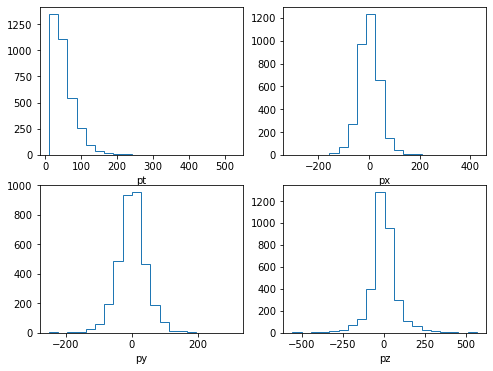

In [13]:
plot_momentum(electron)

In [14]:
def plot_genmomentum(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["genpx"].flatten(), bins=bins, histtype="step")
    plt.xlabel("genpx")
    plt.subplot(2, 2, 2)
    plt.hist(arr["genpy"].flatten(), bins=bins, histtype="step")
    plt.xlabel("genpy")
    plt.subplot(2, 2, 3)
    plt.hist(arr["genpz"].flatten(), bins=bins, histtype="step")
    plt.xlabel("genpz")
    plt.subplot(2, 2, 4)
    plt.hist(arr["gene"].flatten(), bins=bins, histtype="step")
    plt.xlabel("gene")
    plt.show()

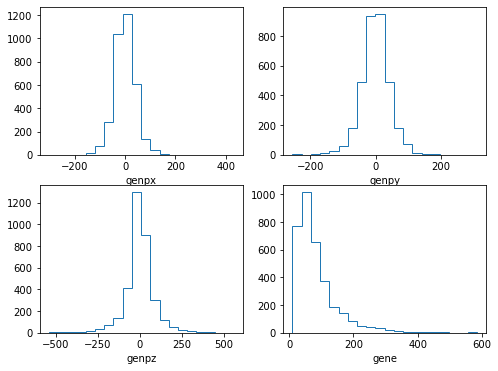

In [15]:
plot_genmomentum(electron)

In [16]:
def plot_kin(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["phi"].flatten(), bins=bins, histtype="step")
    plt.xlabel("phi")
    plt.subplot(2, 2, 2)
    plt.hist(arr["eta"].flatten(), bins=bins, histtype="step")
    plt.xlabel("eta")
    plt.subplot(2, 2, 3)
    plt.hist(arr["e"].flatten(), bins=bins, histtype="step")
    plt.xlabel("energy")
    plt.subplot(2, 2, 4)
    plt.hist(arr["mass"].flatten(), bins=bins, histtype="step")
    plt.xlabel("mass")
    plt.show()

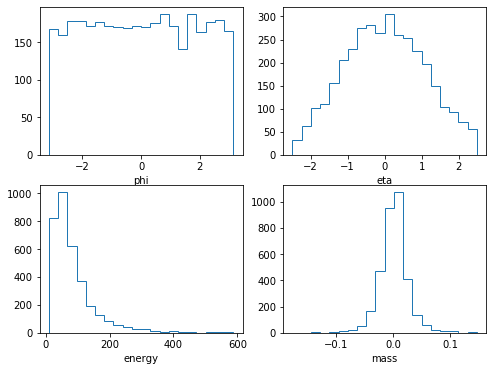

In [17]:
plot_kin(electron)

In [18]:
def plot_iso(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["TrkIso03"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("TrkIso03")
    plt.subplot(2, 2, 2)
    plt.hist(arr["ECaloIso03"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("ECaloIso03")
    plt.subplot(2, 2, 3)
    plt.hist(arr["HCaloIso03"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("HCaloIso03")
    plt.subplot(2, 2, 4)
    plt.hist(arr["rel_iso"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("rel_iso")
    plt.show()

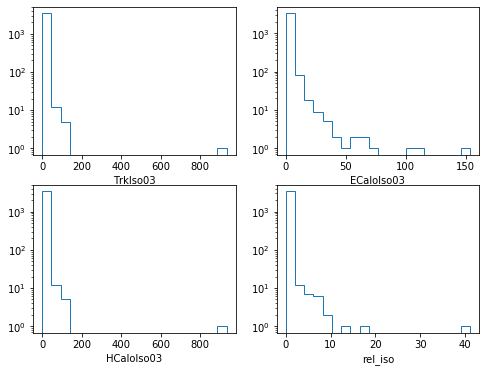

In [19]:
plot_iso(electron)

In [20]:
def plot_id(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["cutbasedid"].flatten(), bins=bins, histtype="step")
    plt.xlabel("cutbasedid")
    plt.subplot(2, 2, 2)
    plt.hist(arr["chi2"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("chi2")
    plt.subplot(2, 2, 3)
    plt.hist(arr["dxy"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("dxy")
    plt.subplot(2, 2, 4)
    plt.hist(arr["charge"].flatten(), bins=bins, histtype="step")
    plt.xlabel("charge")
    plt.show()

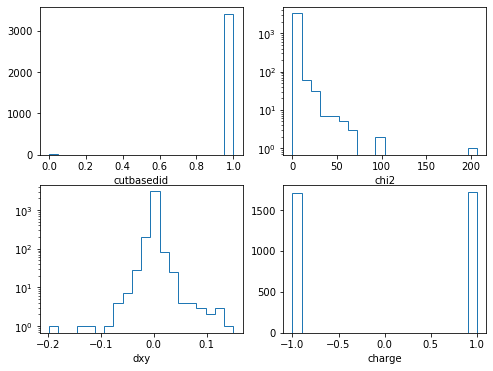

In [21]:
plot_id(electron)

## Muon

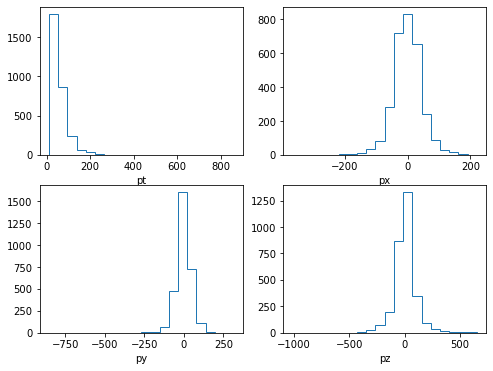

In [22]:
plot_momentum(muon)

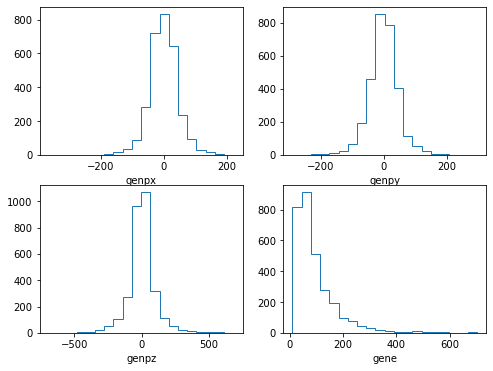

In [23]:
plot_genmomentum(muon)

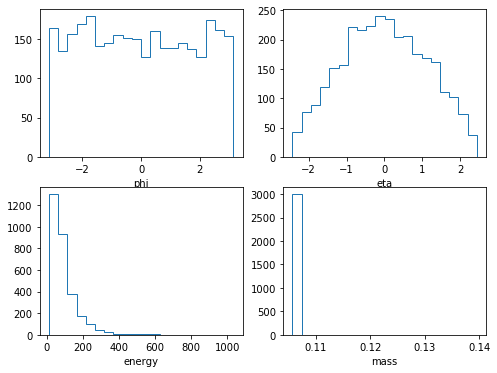

In [24]:
plot_kin(muon)

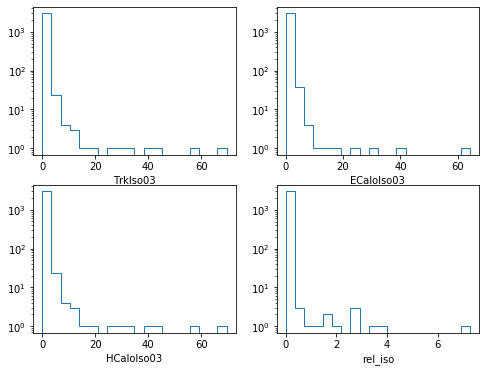

In [25]:
plot_iso(muon)

In [26]:
def plot_muon_id(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["isGlobalMuon"].flatten(), bins=bins, histtype="step")
    plt.xlabel("isGlobalMuon")
    plt.subplot(2, 2, 2)
    plt.hist(arr["isPFMuon"].flatten(), bins=bins, histtype="step")
    plt.xlabel("isPFMuon")
    plt.subplot(2, 2, 3)
    plt.hist(arr["dxy"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("dxy")
    plt.subplot(2, 2, 4)
    plt.hist(arr["charge"].flatten(), bins=bins, histtype="step")
    plt.xlabel("charge")
    plt.show()

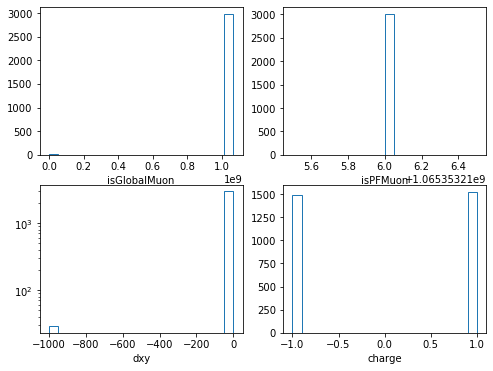

In [27]:
plot_muon_id(muon)

## Tau

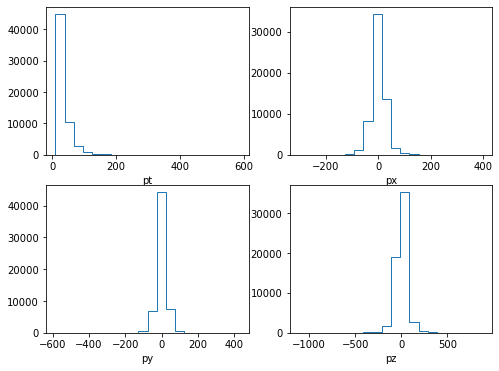

In [71]:
plot_momentum(tau)

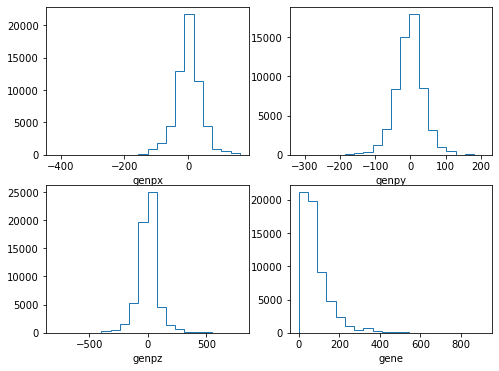

In [72]:
plot_genmomentum(tau)

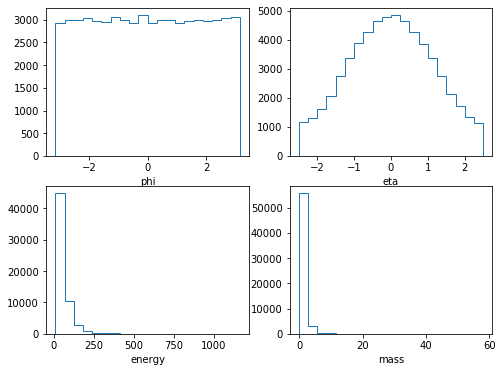

In [73]:
plot_kin(tau)

In [75]:
list(tau.columns)

['p4',
 'pz',
 'dxy',
 'pxHLT45',
 'leadTrackPt',
 'againstElectronTight',
 'z',
 'y',
 'byTightCombinedIsolationDeltaBetaCorr3Hits',
 'genpy',
 'x',
 'byMediumCombinedIsolationDeltaBetaCorr3Hits',
 'byLooseCombinedIsolationDeltaBetaCorr3Hits',
 'pyHLT45',
 'charge',
 'pt',
 'pyHLT40',
 'e',
 'decay',
 'genpz',
 'leptonOrigin',
 'px',
 'phi',
 'againstMuonTight',
 'eHLT40',
 'mass',
 'genpx',
 'byMediumCombinedIsolationDeltaBetaCorr',
 'pxHLT40',
 'gene',
 'byLooseCombinedIsolationDeltaBetaCorr',
 'eta',
 'pzHLT40',
 'eHLT45',
 'byTightCombinedIsolationDeltaBetaCorr',
 'py',
 'againstElectronLoose',
 'againstElectronMedium',
 'againstMuonMedium',
 'againstMuonLoose',
 'pzHLT45']

In [76]:
def plot_tau_lep_disc(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 3, 1)
    plt.hist(arr["againstMuonLoose"].flatten(), bins=bins, histtype="step")
    plt.xlabel("againstMuonLoose")
    plt.subplot(2, 3, 2)
    plt.hist(arr["againstElectronLoose"].flatten(), bins=bins, histtype="step")
    plt.xlabel("againstElectronLoose")
    plt.subplot(2, 3, 3)
    plt.hist(arr["againstMuonMedium"].flatten(), bins=bins, histtype="step")
    plt.xlabel("againstMuonMedium")
    plt.subplot(2, 3, 4)
    plt.hist(arr["againstElectronMedium"].flatten(), bins=bins, histtype="step")
    plt.xlabel("againstElectronMedium")
    plt.subplot(2, 3, 5)
    plt.hist(arr["againstMuonTight"].flatten(), bins=bins, histtype="step")
    plt.xlabel("againstMuonTight")
    plt.subplot(2, 3, 6)
    plt.hist(arr["againstElectronTight"].flatten(), bins=bins, histtype="step")
    plt.xlabel("againstElectronTight")
    plt.show()

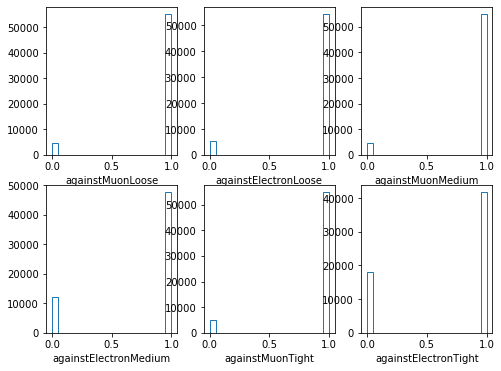

In [78]:
plot_tau_lep_disc(tau)

In [83]:
def plot_tau_id(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 3, 1)
    plt.hist(arr["byLooseCombinedIsolationDeltaBetaCorr3Hits"].flatten(), bins=bins, histtype="step")
    plt.xlabel("Loose 3Hits")
    plt.subplot(2, 3, 2)
    plt.hist(arr["byMediumCombinedIsolationDeltaBetaCorr3Hits"].flatten(), bins=bins, histtype="step")
    plt.xlabel("Medium 3Hits")
    plt.subplot(2, 3, 3)
    plt.hist(arr["byTightCombinedIsolationDeltaBetaCorr3Hits"].flatten(), bins=bins, histtype="step")
    plt.xlabel("Tight 3Hits")
    plt.subplot(2, 3, 4)
    plt.hist(arr["byLooseCombinedIsolationDeltaBetaCorr"].flatten(), bins=bins, histtype="step")
    plt.xlabel("Loose")
    plt.subplot(2, 3, 5)
    plt.hist(arr["byMediumCombinedIsolationDeltaBetaCorr"].flatten(), bins=bins, histtype="step")
    plt.xlabel("Medium")
    plt.subplot(2, 3, 6)
    plt.hist(arr["byTightCombinedIsolationDeltaBetaCorr"].flatten(), bins=bins, histtype="step")
    plt.xlabel("Tight")
    plt.show()

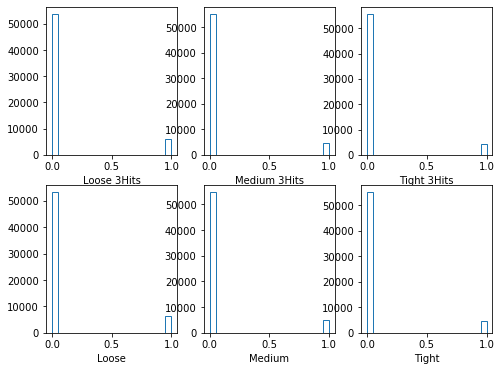

In [84]:
plot_tau_id(tau)

In [87]:
def plot_tau_var(arr, bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 2, 1)
    plt.hist(arr["decay"].flatten(), bins=bins, histtype="step")
    plt.xlabel("decay")
    plt.subplot(2, 2, 2)
    plt.hist(arr["leadTrackPt"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("leadTrackPt")
    plt.subplot(2, 2, 3)
    plt.hist(arr["dxy"].flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("dxy")
    plt.subplot(2, 2, 4)
    plt.hist(arr["charge"].flatten(), bins=bins, histtype="step")
    plt.xlabel("charge")
    plt.show()

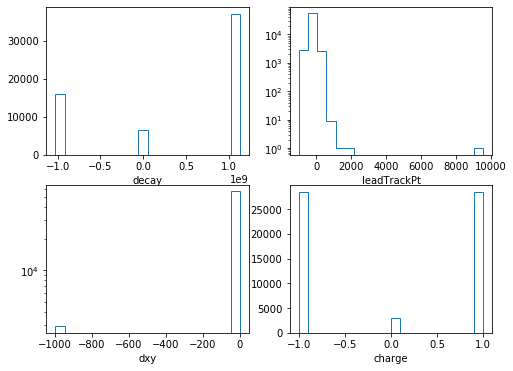

In [88]:
plot_tau_var(tau)

## MET

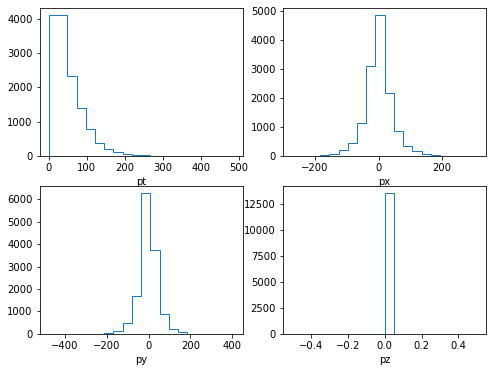

In [93]:
plot_momentum(MET)

## Jets

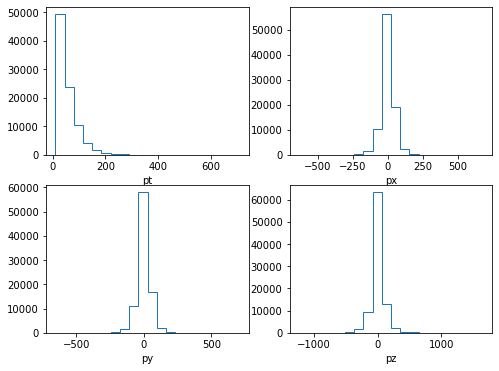

In [94]:
plot_momentum(jet)

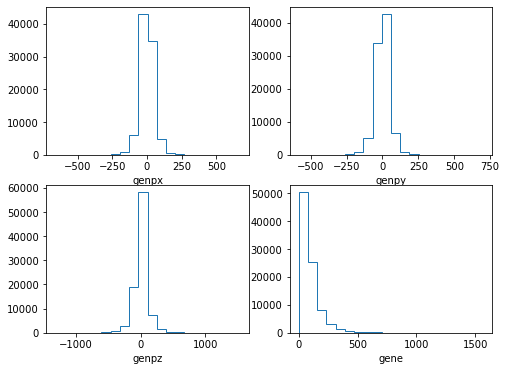

In [96]:
plot_genmomentum(jet)

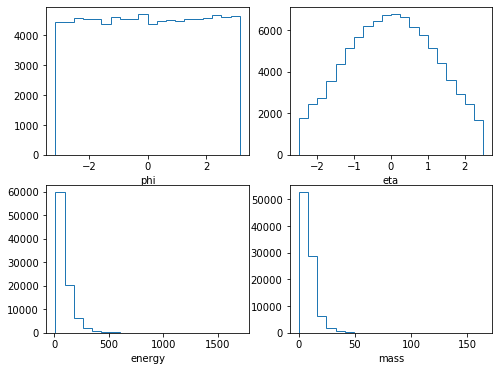

In [95]:
plot_kin(jet)

# Check the cut functions

In [97]:
def select_muon(muon, vtx, eta_cut = 2.5, pt_cut = 10., reliso_cut = 0.15, vtxmatch_cut = 1.):
    
    muon['rel_iso'] = reliso03(muon['TrkIso03'], muon['ECaloIso03'], muon['HCaloIso03'], muon['pt'])
    #muon_global_cut = muon['isGlobalMuon'] == 1
    eta_cut = muon['eta'] < eta_cut
    pt_cut = muon['pt'] > pt_cut
    reliso_cut = muon['rel_iso'] < reliso_cut
    vtx_cut = (muon["z"] - vtx["z"]) < vtxmatch_cut
    
    return muon[ eta_cut & pt_cut & reliso_cut & vtx_cut ]

def select_electron(electron, vtx, eta_cut = 2.5, pt_cut = 10., reliso_cut = 0.15, vtxmatch_cut = 1.):
    
    electron['rel_iso'] = reliso03(electron['TrkIso03'], electron['ECaloIso03'], electron['HCaloIso03'], electron['pt'])
    id_cut = electron["cutbasedid"] == 1
    eta_cut = electron['eta'] < eta_cut
    pt_cut = electron['pt'] > pt_cut
    reliso_cut = electron['rel_iso'] < reliso_cut
    vtx_cut = (electron["z"] - vtx["z"]) < vtxmatch_cut
    
    return electron[ id_cut & eta_cut & pt_cut & reliso_cut & vtx_cut ]

def select_tau(tau, vtx, eta_cut = 2.3, pt_cut = 10., vtxmatch_cut = 1., dxy_cut=0.04, leadTrackPt_cut=5.):
    
    iso_cut = tau["byMediumCombinedIsolationDeltaBetaCorr"] == 1
    nomuon_cut = tau["againstMuonTight"] == 1
    noele_cut = tau["againstElectronTight"] == 1
    # Lead track pt
    leadTrackPt_cut = tau["leadTrackPt"] > leadTrackPt_cut
    # Eta
    #if (abs(evt.Tau_eta[iTau])<1.566) & (abs(evt.Tau_eta[iTau])>1.4442): continue
    eta_cut = tau['eta'] < eta_cut
    # Pt cut
    pt_cut = tau['pt'] > pt_cut
    # Vtx cut
    vtx_cut = (tau["z"] - vtx["z"]) < vtxmatch_cut
    dxy_cut = tau["dxy"] <= dxy_cut
    
    return tau[ iso_cut & nomuon_cut & noele_cut& leadTrackPt_cut & eta_cut & pt_cut & vtx_cut & dxy_cut]

def select_jet(jet, eta_cut = 2.5, pt_cut = 10.):
    
    # Eta cut
    eta_cut = jet['eta'] < eta_cut
    # Pt cut
    pt_cut = jet['pt'] > pt_cut
    
    return jet[eta_cut & pt_cut]

In [98]:
# Object selections
good_muon = select_muon(muon, vtx)
good_electron = select_electron(electron, vtx)
good_tau = select_tau(tau, vtx, pt_cut=40.)
good_jet = select_jet(jet)

In [114]:
def electron_cuts(bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 3, 1)
    plt.hist(electron["pt"].flatten(), bins=bins, histtype="step")
    plt.hist(good_electron["pt"].flatten(), bins=bins, histtype="step")
    plt.xlabel("pt")
    plt.subplot(2, 3, 2)
    plt.hist(electron["eta"].flatten(), bins=bins, histtype="step")
    plt.hist(good_electron["eta"].flatten(), bins=bins, histtype="step")
    plt.xlabel("eta")
    plt.subplot(2, 3, 3)
    plt.hist(electron["rel_iso"].flatten(), bins=bins, histtype="step", range=(0,1))
    plt.hist(good_electron["rel_iso"].flatten(), bins=bins, histtype="step", range=(0,1))
    plt.yscale("log")
    plt.xlabel("rel_iso")
    plt.subplot(2, 3, 4)
    plt.hist(electron["cutbasedid"].flatten(), bins=bins, histtype="step")
    plt.hist(good_electron["cutbasedid"].flatten(), bins=bins, histtype="step")
    plt.xlabel("cutbasedid")
    plt.subplot(2, 3, 5)
    plt.hist((electron["z"] - vtx["z"]).flatten(), bins=bins, histtype="step")
    plt.hist((good_electron["z"] - vtx["z"]).flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("vtx match")   
    
    plt.show()
    

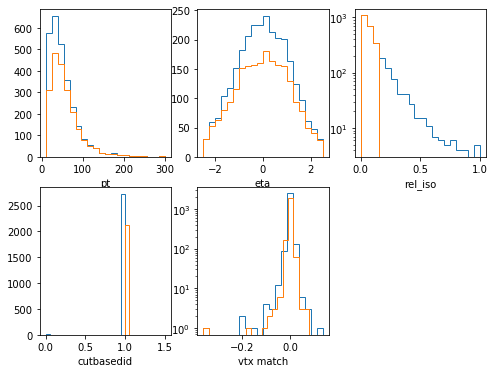

In [115]:
electron_cuts()

In [116]:
def muon_cuts(bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 3, 1)
    plt.hist(muon["pt"].flatten(), bins=bins, histtype="step")
    plt.hist(good_muon["pt"].flatten(), bins=bins, histtype="step")
    plt.xlabel("pt")
    plt.subplot(2, 3, 2)
    plt.hist(muon["eta"].flatten(), bins=bins, histtype="step")
    plt.hist(good_muon["eta"].flatten(), bins=bins, histtype="step")
    plt.xlabel("eta")
    plt.subplot(2, 3, 3)
    plt.hist(muon["rel_iso"].flatten(), bins=bins, histtype="step", range=(0,1))
    plt.hist(good_muon["rel_iso"].flatten(), bins=bins, histtype="step", range=(0,1))
    plt.yscale("log")
    plt.xlabel("rel_iso")
    #plt.subplot(2, 3, 4)
    #plt.hist(muon["cutbasedid"].flatten(), bins=bins, histtype="step")
    #plt.hist(good_muon["cutbasedid"].flatten(), bins=bins, histtype="step")
    #plt.xlabel("cutbasedid")
    plt.subplot(2, 3, 5)
    plt.hist((muon["z"] - vtx["z"]).flatten(), bins=bins, histtype="step")
    plt.hist((good_muon["z"] - vtx["z"]).flatten(), bins=bins, histtype="step")
    plt.yscale("log")
    plt.xlabel("vtx match")   
    
    plt.show()
    

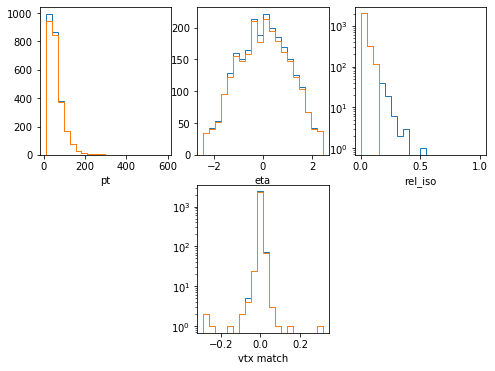

In [117]:
muon_cuts()

In [130]:
def tau_cuts(bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 4, 1)
    plt.hist(tau["pt"].flatten(), bins=bins, histtype="step", density=True)
    plt.hist(good_tau["pt"].flatten(), bins=bins, histtype="step", density=True)
    plt.yscale("log")
    plt.xlabel("pt")
    plt.subplot(2, 4, 2)
    plt.hist(tau["eta"].flatten(), bins=bins, histtype="step", density=True)
    plt.hist(good_tau["eta"].flatten(), bins=bins, histtype="step", density=True)
    plt.xlabel("eta")
    plt.subplot(2, 4, 3)
    plt.hist(tau["byMediumCombinedIsolationDeltaBetaCorr"].flatten(), bins=bins, histtype="step", range=(0,1), density=True)
    plt.hist(good_tau["byMediumCombinedIsolationDeltaBetaCorr"].flatten(), bins=bins, histtype="step", range=(0,1), density=True)
    plt.xlabel("byMediumCombinedIsolationDeltaBetaCorr")
    plt.subplot(2, 4, 4)
    plt.hist(tau["againstMuonTight"].flatten(), bins=bins, histtype="step", density=True)
    plt.hist(good_tau["againstMuonTight"].flatten(), bins=bins, histtype="step", density=True)
    plt.xlabel("againstMuonTight")
    plt.subplot(2, 4, 5)
    plt.hist(tau["againstElectronTight"].flatten(), bins=bins, histtype="step", density=True)
    plt.hist(good_tau["againstElectronTight"].flatten(), bins=bins, histtype="step", density=True)
    plt.xlabel("againstElectronTight") 
    plt.subplot(2, 4, 6)
    plt.hist(tau["leadTrackPt"].flatten(), bins=bins, histtype="step", density=True)
    plt.hist(good_tau["leadTrackPt"].flatten(), bins=bins, histtype="step", density=True)
    plt.xlabel("leadTrackPt")
    plt.subplot(2, 4, 7)
    plt.hist(tau["dxy"].flatten(), bins=bins, histtype="step", density=True)
    plt.hist(good_tau["dxy"].flatten(), bins=bins, histtype="step", density=True)
    plt.xlabel("dxy")
    plt.subplot(2, 4, 8)
    plt.hist((tau["z"] - vtx["z"]).flatten(), bins=bins, histtype="step", density=True)
    plt.hist((good_tau["z"] - vtx["z"]).flatten(), bins=bins, histtype="step", density=True)
    plt.yscale("log")
    plt.xlabel("vtx match")   
    
    plt.show()
    

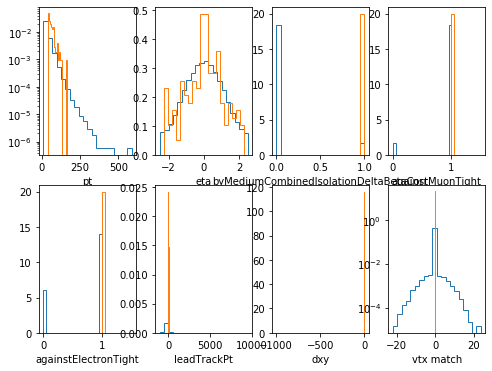

In [131]:
tau_cuts()

In [132]:
def jet_cuts(bins=20):
    
    fig = plt.figure(figsize=(8,6))
    plt.subplot(2, 1, 1)
    plt.hist(jet["pt"].flatten(), bins=bins, histtype="step")
    plt.hist(good_jet["pt"].flatten(), bins=bins, histtype="step")
    plt.xlabel("pt")
    plt.subplot(2, 1, 2)
    plt.hist(jet["eta"].flatten(), bins=bins, histtype="step")
    plt.hist(good_jet["eta"].flatten(), bins=bins, histtype="step")
    plt.xlabel("eta")    
    plt.show()

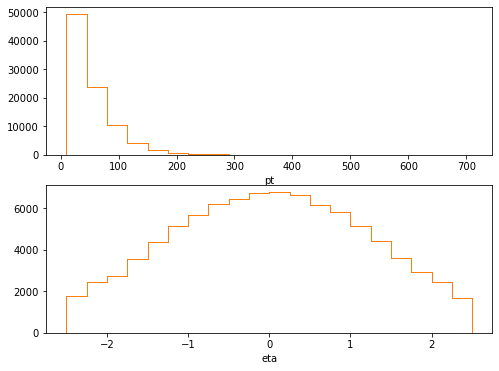

In [133]:
jet_cuts()